In [1]:
import sqlite3
conn = sqlite3.connect('database_final.db')
cursor = conn.cursor()

In [2]:
# Fetch all table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])
    table_name = table[0]

    # Fetch the column names of the table
    cursor.execute("PRAGMA table_info({})".format(table_name))
    columns = cursor.fetchall()

    # Print the column names
    for column in columns:
        print(column[1])
    print('\n\n')

ward_code_to_name
geogcode
description



unemployement_Total
Gender
measure
geogcode
date
value



unemployement_Male
Gender
measure
geogcode
date
value



unemployement_Female
Gender
measure
geogcode
date
value



IOD_feature_code_score_19
LSOA Code
a. Index of Multiple Deprivation (IMD)
b. Income Deprivation Domain
c. Employment Deprivation Domain
d. Education, Skills and Training Domain
e. Health Deprivation and Disability Domain
f. Crime Domain
g. Barriers to Housing and Services Domain
h. Living Environment Deprivation Domain
i. Income Deprivation Affecting Children Index (IDACI)
j. Income Deprivation Affecting Older People Index (IDAOPI)



IOD_feature_code_score_15
LSOA Code
a. Index of Multiple Deprivation (IMD)
b. Income Deprivation Domain
c. Employment Deprivation Domain
d. Education, Skills and Training Domain
e. Health Deprivation and Disability Domain
f. Crime Domain
g. Barriers to Housing and Services Domain
h. Living Environment Deprivation Domain
i. Income Deprivation 

In [6]:
# main
import pandas as pd
table_query = "SELECT * FROM table_name WHERE month LIKE '2019%' OR month LIKE '2015%' OR month LIKE '2014%' OR month LIKE '2016%' OR month LIKE '2017%' OR month LIKE '2018%'"
table_df = pd.read_sql_query(table_query, conn)
table_df

,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type
0,2014-01,Metropolitan Police Service,Metropolitan Police Service,0.877306,51.118088,On or near Acorn Close,E01032818,Ashford 009H,Violence and sexual offences
1,2014-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour
2,2014-01,Metropolitan Police Service,Metropolitan Police Service,0.145888,51.593835,On or near Providence Place,E01000027,Barking and Dagenham 001A,Anti-social behaviour
3,2014-01,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour
4,2014-01,Metropolitan Police Service,Metropolitan Police Service,0.145888,51.593835,On or near Providence Place,E01000027,Barking and Dagenham 001A,Anti-social behaviour
...,...,...,...,...,...,...,...,...,...
6023287,2019-12,Metropolitan Police Service,Metropolitan Police Service,-0.534400,51.330219,On or near River Court,E01030984,Woking 004E,Violence and sexual offences
6023288,2019-12,Metropolitan Police Service,Metropolitan Police Service,-2.121588,52.579894,On or near Vicarage Road,E01010530,Wolverhampton 035H,Burglary
6023289,2019-12,Metropolitan Police Service,Metropolitan Police Service,-0.384598,50.809639,On or near Bowers Court,E01031809,Worthing 010C,Other theft
6023290,2019-12,Metropolitan Police Service,Metropolitan Police Service,-0.777389,51.625615,On or near Pettifer Way,E01017907,Wycombe 013E,Drugs


In [32]:
df_2014 = table_df[table_df['Month'].str.startswith('2014')]
df_2015 = table_df[table_df['Month'].str.startswith('2015')]
df_2016 = table_df[table_df['Month'].str.startswith('2016')]
df_2017 = table_df[table_df['Month'].str.startswith('2017')]
df_2018 = table_df[table_df['Month'].str.startswith('2018')]

df_20148 = pd.concat([df_2014, df_2015, df_2016, df_2017, df_2018])
df_20148

df_2019 = table_df[table_df['Month'].str.startswith('2019')]

In [33]:
# get necessary data from df_2019 and df_20148
conc_19 = df_2019[['Month', 'LSOA code', 'Crime type']]
conc_19 = conc_19[conc_19['Crime type'] == 'Burglary'].groupby(['Month', 'LSOA code']).size().reset_index(name='Number of Burglaries')
conc_19 = conc_19.sort_values('Month')
conc_19

conc_148 = df_20148[['Month', 'LSOA code', 'Crime type']]
conc_148 = conc_148[conc_148['Crime type'] == 'Burglary'].groupby(['Month', 'LSOA code']).size().reset_index(name='Number of Burglaries')
conc_148 = conc_148.sort_values('Month')
conc_148

,Month,LSOA code,Number of Burglaries
0,2014-01,E01000005,1
2323,2014-01,E01003303,7
2324,2014-01,E01003304,4
2325,2014-01,E01003305,1
2326,2014-01,E01003307,4
...,...,...,...
180217,2018-12,E01001653,1
180218,2018-12,E01001654,1
180219,2018-12,E01001655,2
180209,2018-12,E01001642,3


In [34]:
# unemployment
import pandas as pd
query = "SELECT geogcode AS 'LSOA code', strftime('%Y-%m', date) AS Month, value as 'Unemployment rate' FROM montly_unemployement_claimant_count_by_lsoa_barnet"
df_unmepl = pd.read_sql_query(query, conn)
df_unmepl

,LSOA code,Month,Unemployment rate
0,E01000248,1986-01,NaN
1,E01000248,1986-02,NaN
2,E01000248,1986-03,NaN
3,E01000248,1986-04,NaN
4,E01000248,1986-05,NaN
...,...,...,...
94971,Column Total,2022-12,10985.0
94972,Column Total,2023-01,10695.0
94973,Column Total,2023-02,10765.0
94974,Column Total,2023-03,10845.0


In [35]:
df_unmepl['Month'] = pd.to_datetime(df_unmepl['Month'], format='%Y-%m-%d')
df_unmepl['Month'] = df_unmepl['Month'].dt.strftime('%Y-%m')
unempl_2014 = df_unmepl[df_unmepl['Month'].str.startswith('2014')]
unempl_2015 = df_unmepl[df_unmepl['Month'].str.startswith('2015')]
unempl_2016 = df_unmepl[df_unmepl['Month'].str.startswith('2016')]
unempl_2017 = df_unmepl[df_unmepl['Month'].str.startswith('2017')]
unempl_2018 = df_unmepl[df_unmepl['Month'].str.startswith('2018')]
unempl_20148 = pd.concat([unempl_2014, unempl_2015, unempl_2016, unempl_2017, unempl_2018])
unempl_20148

unempl_2019 = df_unmepl[df_unmepl['Month'].str.startswith('2019')].copy()
unempl_2019

,LSOA code,Month,Unemployment rate
396,E01000248,2019-01,15.0
397,E01000248,2019-02,15.0
398,E01000248,2019-03,15.0
399,E01000248,2019-04,10.0
400,E01000248,2019-05,15.0
...,...,...,...
94931,Column Total,2019-08,5665.0
94932,Column Total,2019-09,5805.0
94933,Column Total,2019-10,6025.0
94934,Column Total,2019-11,6145.0


In [13]:
# housing
query = "SELECT `LSOA code`, `Proportion rented` FROM housing_by_lsoa"
df_house = pd.read_sql_query(query, conn)
df_house

,LSOA code,Proportion rented
0,E01000001,0.419162
1,E01000002,0.472727
2,E01000003,0.625616
3,E01000005,0.916667
4,E01000006,0.504505
...,...,...
35667,W01002036,0.409091
35668,W01002037,0.398230
35669,W01002038,0.293103
35670,W01002039,0.201493


In [14]:
# sunlight
query = "SELECT `Sunlight`, `Year-Month` as `Month` FROM sunlight"
df_sun = pd.read_sql_query(query, conn)
df_sun

,Sunlight,Month
0,2.448102,2001-01-01 00:00:00
1,3.125319,2001-02-01 00:00:00
2,2.953300,2001-03-01 00:00:00
3,4.744445,2001-04-01 00:00:00
4,7.725524,2001-05-01 00:00:00
...,...,...
262,1.935724,2022-11-01 00:00:00
263,1.894136,2022-12-01 00:00:00
264,2.393847,2023-01-01 00:00:00
265,3.197894,2023-02-01 00:00:00


In [15]:
df_sun['Month'] = pd.to_datetime(df_sun['Month'], format='%Y-%m-%d')
df_sun['Month'] = df_sun['Month'].dt.strftime('%Y-%m')
sun_2014 = df_sun[df_sun['Month'].str.startswith('2014')]
sun_2015 = df_sun[df_sun['Month'].str.startswith('2015')]
sun_2016 = df_sun[df_sun['Month'].str.startswith('2016')]
sun_2017 = df_sun[df_sun['Month'].str.startswith('2017')]
sun_2018 = df_sun[df_sun['Month'].str.startswith('2018')]
sun_20148 = pd.concat([sun_2014, sun_2015, sun_2016, sun_2017, sun_2018])
sun_20148

sun_2019 = df_sun[df_sun['Month'].str.startswith('2019')]
sun_2019

,Sunlight,Month
216,1.740893,2019-01
217,4.363079,2019-02
218,4.164106,2019-03
219,5.779824,2019-04
220,6.574293,2019-05
221,5.710219,2019-06
222,6.829995,2019-07
223,6.713303,2019-08
224,5.423063,2019-09
225,2.654354,2019-10


In [37]:
# merge the data
merged_df_19 = pd.merge(conc_19, df_house, on=['LSOA code'])
merged_df_19 = pd.merge(merged_df_19, sun_2019, on=['Month'])
merged_df_19 = pd.merge(merged_df_19, unempl_2019, on=['LSOA code', 'Month'])
merged_df_19

merged_df_148 = pd.merge(conc_148, df_house, on=['LSOA code'])
merged_df_148 = pd.merge(merged_df_148, sun_20148, on=['Month'])
merged_df_148 = pd.merge(merged_df_148, unempl_20148, on=['LSOA code', 'Month'])
merged_df_148 = merged_df_148.sort_values('Month')
merged_df_148

,Month,LSOA code,Number of Burglaries,Proportion rented,Sunlight,Unemployment rate
0,2014-01,E01000197,7,0.482270,1.783853,30.0
96,2014-01,E01000256,2,0.303704,1.783853,25.0
97,2014-01,E01000257,1,0.527473,1.783853,40.0
98,2014-01,E01000258,3,0.339744,1.783853,10.0
99,2014-01,E01000259,1,0.367347,1.783853,20.0
...,...,...,...,...,...,...
6351,2018-12,E01000296,1,0.609272,1.356375,15.0
6352,2018-12,E01000297,1,0.435185,1.356375,10.0
6353,2018-12,E01000299,3,0.591160,1.356375,40.0
6355,2018-12,E01000301,1,0.264151,1.356375,5.0


In [38]:
merged_df_19

,Month,LSOA code,Number of Burglaries,Proportion rented,Sunlight,Unemployment rate
0,2019-01,E01000201,2,0.192308,1.740893,5.0
1,2019-01,E01000202,1,0.319672,1.740893,5.0
2,2019-01,E01000203,1,0.485294,1.740893,30.0
3,2019-01,E01000204,3,0.355072,1.740893,30.0
4,2019-01,E01000205,2,0.214876,1.740893,5.0
...,...,...,...,...,...,...
1701,2019-09,E01000212,1,0.376147,5.423063,10.0
1702,2019-09,E01000257,1,0.527473,5.423063,40.0
1703,2019-09,E01000154,1,0.702128,5.423063,75.0
1704,2019-09,E01000215,2,0.542857,5.423063,35.0


In [ ]:
# the model

In [39]:
lsoa_codes = merged_df_148['LSOA code'].unique()

# Dictionary to store dataframes for each LSOA
lsoa_data = {}

# Iterate over each LSOA code and create a separate dataframe
for lsoa_code in lsoa_codes:
    lsoa_df = merged_df_148[merged_df_148['LSOA code'] == lsoa_code].copy()
    lsoa_data[lsoa_code] = lsoa_df
    
from sklearn.ensemble import RandomForestRegressor

# Dictionary to store predictions for each LSOA
lsoa_predictions = {}

In [40]:
# regression
import numpy as np

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error, mean_absolute_percentage_error, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import numpy as np

mael = []
msel = []
rmsel = []
r2l = []
explained_variancel =[]
median_absolutel = []
mapel = []
precisionl = []
recalll = []
f1l = []
accuracyl = []

# Get unique LSOA codes
lsoa_codes = merged_df_148['LSOA code'].unique()

lsoa_predictions = {}

for lsoa_code in lsoa_codes:
    train = merged_df_148[merged_df_148['LSOA code'] == lsoa_code]
    test = merged_df_19[merged_df_19['LSOA code'] == lsoa_code]
    
    # Check if data is not empty
    if not train.empty and not test.empty:
        # Split the training and testing set into x and y
        X_train = train[['Proportion rented', 'Sunlight', 'Unemployment rate']].values
        y_train = train['Number of Burglaries'].values
        X_test = test[['Proportion rented', 'Sunlight', 'Unemployment rate']].values
        y_test = test['Number of Burglaries'].values
        
        # random forest model
        model = RandomForestRegressor(n_estimators=100, random_state=123)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Store the predictions for the current LSOA code
        lsoa_predictions[lsoa_code] = y_pred
        
        # Calculate the performance metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        explained_variance = explained_variance_score(y_test, y_pred)
        median_absolute = median_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        
        mael.append(mae)
        msel.append(mse)
        rmsel.append(rmse)
        r2l.append(r2)
        explained_variancel.append(explained_variance)
        median_absolutel.append(median_absolute)
        mapel.append(mape)
    else:
        print('Warning: No data found for LSOA code', lsoa_code)

# Print the predictions for each LSOA code
#for lsoa_code, predictions in lsoa_predictions.items():
#    print('LSOA Code:', lsoa_code)
#    print('Predictions:', predictions)
#    print('---')
    
#performance metrics
final_mae = np.mean(mael)
final_mse = np.mean(msel)
final_rmse = np.mean(rmsel)
final_r2 = np.mean([x for x in r2l if not pd.isna(x)])
final_explained_variance = np.mean(explained_variancel)
final_median_absolute = np.mean(median_absolutel)
final_mape = np.mean(mapel)

print('Final Mean Absolute Error:', final_mae)
print('Final Mean Squared Error:', final_mse)
print('Final Root Mean Squared Error:', final_rmse)
print('Final R-squared Score:', final_r2)
print('Final Explained Variance Score:', final_explained_variance)
print('Final Median Absolute Error:', final_median_absolute)
print('Final Mean Absolute Percentage Error:', final_mape)

Final Mean Absolute Error: 1.0549892777953753
Final Mean Squared Error: 2.1552774539647346
Final Root Mean Squared Error: 1.3364907046803787
Final R-squared Score: -1.1608756157210531
Final Explained Variance Score: -0.6672419116438744
Final Median Absolute Error: 0.8726341463414633
Final Mean Absolute Percentage Error: 0.6495710957383692


In [42]:
lsoa_predictions

{'E01000197': array([2.5 , 2.03, 1.53, 1.74, 1.98, 1.69, 1.73]),
 'E01000256': array([1.33, 1.82, 1.73, 1.76, 2.7 , 1.1 , 1.54, 1.49, 1.38, 2.95]),
 'E01000257': array([2.95, 2.1 , 2.44, 1.28, 1.47, 1.98, 2.43, 2.1 , 2.26]),
 'E01000258': array([1.95, 2.77, 1.21, 1.58, 1.63, 2.28, 2.3 , 1.9 , 1.34, 2.39]),
 'E01000259': array([2.8 , 1.18, 2.45, 2.56, 5.19, 1.36, 1.99, 2.56, 1.74]),
 'E01000260': array([1.64, 2.19, 1.98, 2.83, 2.16, 1.6 ]),
 'E01000261': array([2.39, 1.2 , 1.98, 1.93, 1.4 , 1.01]),
 'E01000255': array([1.26, 2.65, 1.24, 1.74, 1.21, 1.94, 1.82, 2.55]),
 'E01000266': array([1.57, 2.26, 1.28, 1.66, 1.86, 1.72, 1.02, 1.84, 2.26, 1.52]),
 'E01000268': array([2.53, 1.79, 1.88, 2.12, 1.71, 2.01, 2.09, 1.63, 1.5 , 4.  ]),
 'E01000253': array([1.93, 1.09, 1.31, 1.18, 1.51, 1.56, 1.57, 1.78, 3.1 , 1.34]),
 'E01000154': array([1.08, 1.08, 1.08, 1.75, 1.45]),
 'E01000153': array([2.85, 1.58, 1.86, 4.19, 4.79, 1.55, 2.75, 3.62]),
 'E01000307': array([2.06, 3.31, 4.46, 2.07, 1.9 , 2.

In [ ]:
# classificaiton

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

# Get unique LSOA codes
lsoa_codes = merged_df_148['LSOA code'].unique()

lsoa_predictions = {}

for lsoa_code in lsoa_codes:
    train = merged_df_148[merged_df_148['LSOA code'] == lsoa_code]
    test = merged_df_19[merged_df_19['LSOA code'] == lsoa_code]
    
    # Check if data is not empty
    if not train.empty and not test.empty:
        # Split the training and testing set into x and y
        X_train = train[['Proportion rented', 'Sunlight', 'Unemployment rate']].values
        y_train = train['Number of Burglaries'].values
        X_test = test[['Proportion rented', 'Sunlight', 'Unemployment rate']].values
        y_test = test['Number of Burglaries'].values
        
        # random forest model
        model = RandomForestClassifier(n_estimators=100, random_state=123)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Store the predictions for the current LSOA code
        lsoa_predictions[lsoa_code] = y_pred
        
        # Calculate the performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
    else:
        print('Warning: No data found for LSOA code', lsoa_code)

# Print the predictions for each LSOA code
# for lsoa_code, predictions in lsoa_predictions.items():
#     print('LSOA Code:', lsoa_code)
#     print('Predictions:', predictions)
#     print('---')

# Performance metrics
final_accuracy = np.mean(accuracy_list)
final_precision = np.mean(precision_list)
final_recall = np.mean(recall_list)
final_f1 = np.mean(f1_list)

print('Final Accuracy:', final_accuracy)
print('Final Precision:', final_precision)
print('Final Recall:', final_recall)
print('Final F1 Score:', final_f1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedM

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedM

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWar

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWar

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWar

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Pr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Pr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWar

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedM

Final Accuracy: 0.35825027276246785
Final Precision: 0.3703765292435443
Final Recall: 0.35825027276246785
Final F1 Score: 0.33495885196980485


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWar

In [ ]:
# time lags

In [44]:
grouped = merged_df_148.groupby('Month').size()
pd.DataFrame(grouped)

,0
Month,
2014-01,149
2014-02,144
2014-03,147
2014-04,151
2014-05,131
2014-06,127
2014-07,128
2014-08,142
2014-09,139


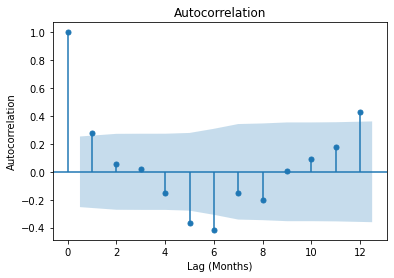

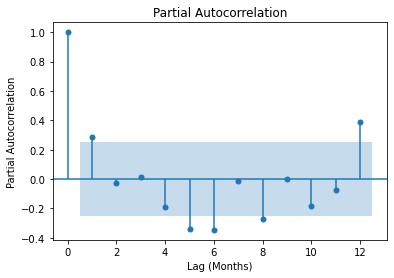

In [46]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plot_acf(grouped, lags=12, ax=ax)
ax.set_xlabel('Lag (Months)')
ax.set_ylabel('Autocorrelation')
plt.show()

fig, ax = plt.subplots()
plot_pacf(grouped, lags=12, ax=ax)
ax.set_xlabel('Lag (Months)')
ax.set_ylabel('Partial Autocorrelation')
plt.show()

In [47]:
merged_df_148['lag 1'] = merged_df_148['Number of Burglaries'].shift(1)
merged_df_148['lag 5'] = merged_df_148['Number of Burglaries'].shift(5)
merged_df_148['lag 6'] = merged_df_148['Number of Burglaries'].shift(6)
merged_df_148['lag 8'] = merged_df_148['Number of Burglaries'].shift(8)
merged_df_148['lag 12'] = merged_df_148['Number of Burglaries'].shift(12)
#month_df.iloc[[10]]
merged_df_148

,Month,LSOA code,Number of Burglaries,Proportion rented,Sunlight,Unemployment rate,lag 1,lag 5,lag 6,lag 8,lag 12
0,2014-01,E01000197,7,0.482270,1.783853,30.0,NaN,NaN,NaN,NaN,NaN
96,2014-01,E01000256,2,0.303704,1.783853,25.0,7.0,NaN,NaN,NaN,NaN
97,2014-01,E01000257,1,0.527473,1.783853,40.0,2.0,NaN,NaN,NaN,NaN
98,2014-01,E01000258,3,0.339744,1.783853,10.0,1.0,NaN,NaN,NaN,NaN
99,2014-01,E01000259,1,0.367347,1.783853,20.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6351,2018-12,E01000296,1,0.609272,1.356375,15.0,2.0,4.0,3.0,4.0,1.0
6352,2018-12,E01000297,1,0.435185,1.356375,10.0,1.0,1.0,4.0,1.0,2.0
6353,2018-12,E01000299,3,0.591160,1.356375,40.0,1.0,3.0,1.0,3.0,1.0
6355,2018-12,E01000301,1,0.264151,1.356375,5.0,3.0,5.0,3.0,4.0,2.0


In [48]:
# run the regression model again

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error, mean_absolute_percentage_error, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

mael = []
msel = []
rmsel = []
r2l = []
explained_variancel =[]
median_absolutel = []
mapel = []
precisionl = []
recalll = []
f1l = []
accuracyl = []

# Get unique LSOA codes
lsoa_codes = merged_df_148['LSOA code'].unique()

lsoa_predictions = {}

for lsoa_code in lsoa_codes:
    train = merged_df_148[merged_df_148['LSOA code'] == lsoa_code]
    test = merged_df_19[merged_df_19['LSOA code'] == lsoa_code]
    
    # Check if data is not empty
    if not train.empty and not test.empty:
        # Split the training and testing set into x and y
        X_train = train[['Proportion rented', 'Sunlight']].values
        y_train = train['Number of Burglaries'].values
        X_test = test[['Proportion rented', 'Sunlight']].values
        y_test = test['Number of Burglaries'].values
        
        # random forest model
        model = RandomForestRegressor(n_estimators=100, random_state=123)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Store the predictions for the current LSOA code
        lsoa_predictions[lsoa_code] = y_pred
        
        # Calculate the performance metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        explained_variance = explained_variance_score(y_test, y_pred)
        median_absolute = median_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        
        mael.append(mae)
        msel.append(mse)
        rmsel.append(rmse)
        r2l.append(r2)
        explained_variancel.append(explained_variance)
        median_absolutel.append(median_absolute)
        mapel.append(mape)
    else:
        print('Warning: No data found for LSOA code', lsoa_code)

# Print the predictions for each LSOA code
#for lsoa_code, predictions in lsoa_predictions.items():
#    print('LSOA Code:', lsoa_code)
#    print('Predictions:', predictions)
#    print('---')
    
#performance metrics
final_mae = np.mean(mael)
final_mse = np.mean(msel)
final_rmse = np.mean(rmsel)
final_r2 = np.mean([x for x in r2l if not pd.isna(x)])
final_explained_variance = np.mean(explained_variancel)
final_median_absolute = np.mean(median_absolutel)
final_mape = np.mean(mapel)

print('Final Mean Absolute Error:', final_mae)
print('Final Mean Squared Error:', final_mse)
print('Final Root Mean Squared Error:', final_rmse)
print('Final R-squared Score:', final_r2)
print('Final Explained Variance Score:', final_explained_variance)
print('Final Median Absolute Error:', final_median_absolute)
print('Final Mean Absolute Percentage Error:', final_mape)

Final Mean Absolute Error: 1.047025666068349
Final Mean Squared Error: 2.1970345063703234
Final Root Mean Squared Error: 1.3523707359138106
Final R-squared Score: -1.154830686505313
Final Explained Variance Score: -0.7661659616626546
Final Median Absolute Error: 0.8725121951219511
Final Mean Absolute Percentage Error: 0.6220454156548059


In [36]:
# wards

In [49]:
# this is a random df, just made for tetsing maps
lsoas = list(lsoa_predictions.keys())
last_numbers = [lst[-1] for lst in lsoa_predictions.values()]
LSOA_count = pd.DataFrame({'LSOA code': lsoas, 'Predicted_nr_burglaries': last_numbers})
LSOA_count

,LSOA code,Predicted_nr_burglaries
0,E01000005,1.08
1,E01003303,1.35
2,E01003304,2.41
3,E01003305,1.04
4,E01003307,2.02
...,...,...
4661,E01030604,1.00
4662,E01021744,1.00
4663,E01032776,1.00
4664,E01015925,1.00


In [50]:
df_w = pd.read_csv('C:/Users/20212324/DC2/Lower_Layer_Super_Output_Area_(2021)_to_Ward_(2023)_to_LAD_(2023)_Lookup_in_England_and_Wales.csv')
df_ward_LSOA = pd.DataFrame()
df_ward_LSOA[['LSOA code', 'Ward code']] = df_w[['LSOA21CD', 'WD23CD']]
df_ward_LSOA

,LSOA code,Ward code
0,E01012239,E05014872
1,E01012286,E05014872
2,E01012287,E05014872
3,E01012288,E05014872
4,E01012289,E05014872
...,...,...
35667,W01001320,W05001625
35668,W01001321,W05001625
35669,W01001322,W05001625
35670,W01001324,W05001626


In [59]:
merged_LSOA_ward = pd.merge(df_ward_LSOA, LSOA_count, on=['LSOA code'])
merged_LSOA_ward

pred_burgl_per_ward = merged_LSOA_ward.groupby('Ward code').sum()
pred_burgl_per_ward = pred_burgl_per_ward.reset_index()
pred_burgl_per_ward

,Ward code,Predicted_nr_burglaries
0,E05002229,1.00
1,E05002240,1.00
2,E05004148,1.00
3,E05004150,1.01
4,E05004155,2.00
...,...,...
696,E05014119,12.40
697,E05015096,1.00
698,E05015097,1.10
699,E05015100,2.00


In [66]:
pred_burgl_per_ward.to_csv('ward_count.csv', index=False)

In [50]:
# Close the cursor and connection
cursor.close()
conn.close()